# **Inferencia Estadística: Variables Numéricas vs Stroke 🧬**

En este notebook analizamos la relación entre las variables continuas (`age`, `avg_glucose_level`, `bmi`) y la variable objetivo (`stroke`).

**Metodología:**
1. **Gráficos de Violín:** Para observar la densidad y los cuartiles de cada grupo simultáneamente.
2. **Gráficos de Densidad Traslapados (KDE):** Para visualizar áreas de mayor riesgo.
3. **Test Levene:** Para saber si existen varianzas similares entre los 2 grupos.
4. **Prueba U de Mann-Whitney:** Dado que nuestras variables no siguen una distribución normal (como vimos en el notebook anterior), usaremos esta prueba no paramétrica para comparar medianas.
5. **D de Cohen:** Para medir el "Tamaño del Efecto" y saber qué tan grande es la diferencia real entre grupos.

C:\Users\delhy.py\AppData\Local\Temp\ipykernel_6008\1993856171.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='stroke', y=col, ax=ax1, palette='magma', inner="quartile")


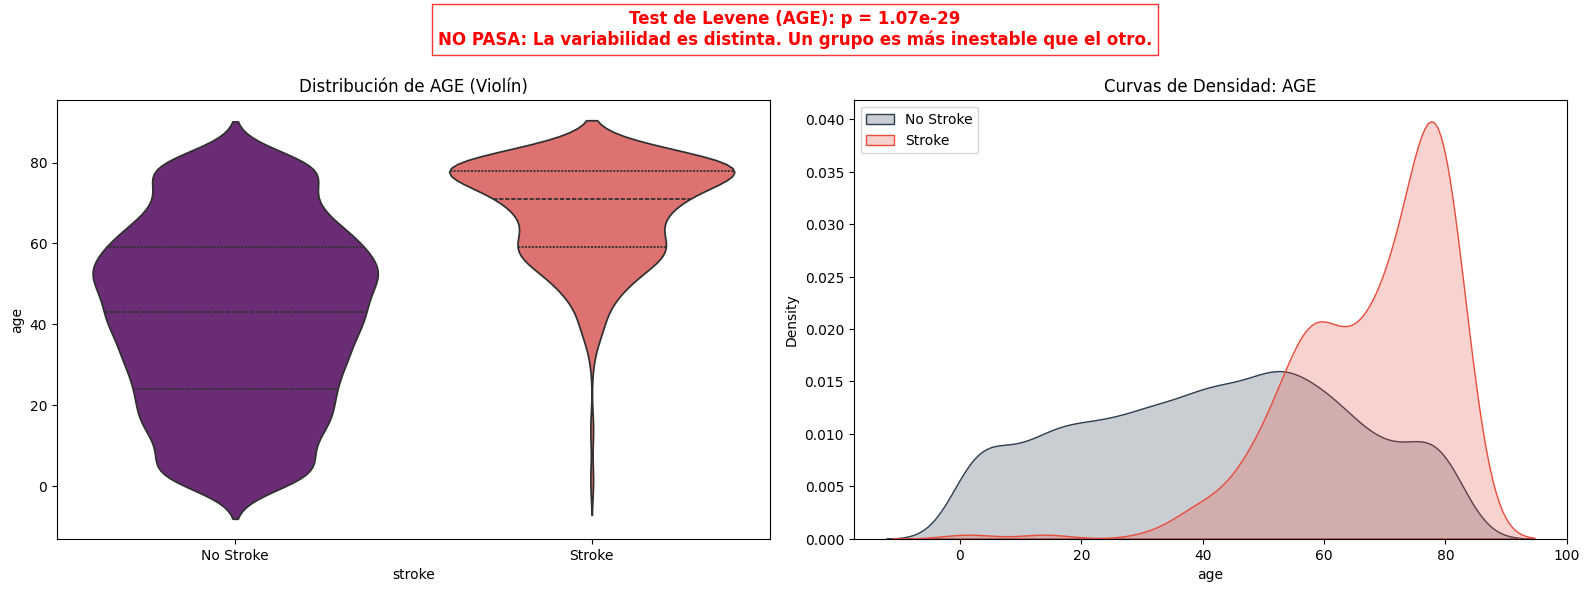

C:\Users\delhy.py\AppData\Local\Temp\ipykernel_6008\1993856171.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='stroke', y=col, ax=ax1, palette='magma', inner="quartile")


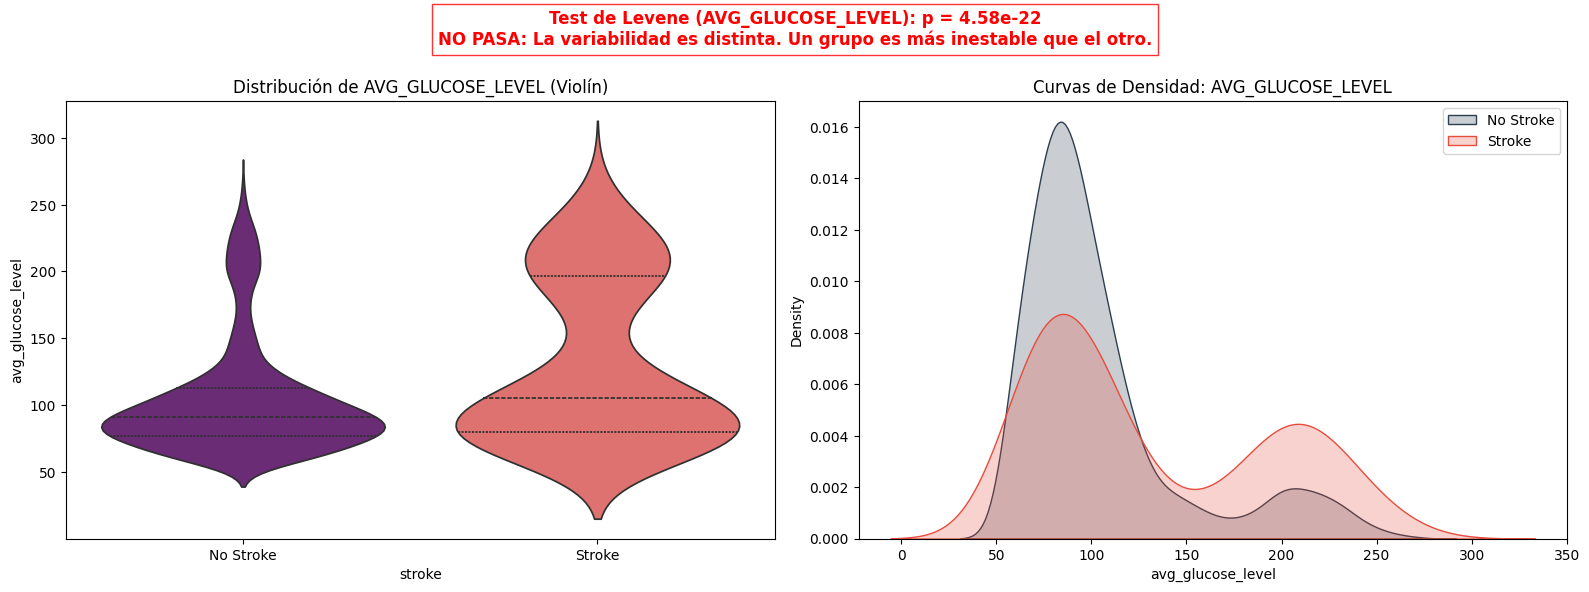

C:\Users\delhy.py\AppData\Local\Temp\ipykernel_6008\1993856171.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='stroke', y=col, ax=ax1, palette='magma', inner="quartile")


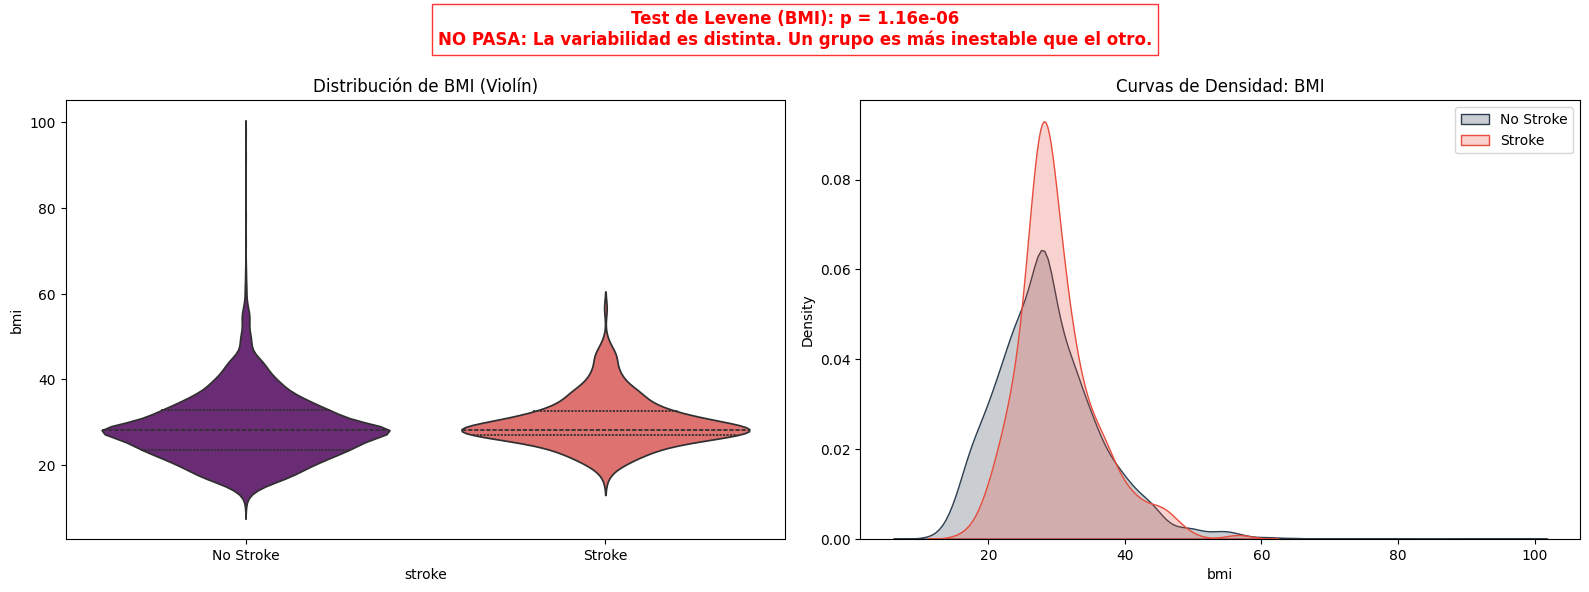

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import mannwhitneyu, levene

# Cargar dataset
df = pd.read_csv('dataset/healthcare-dataset-stroke-transformed.csv')
num_cols = ['age', 'avg_glucose_level', 'bmi']

for col in num_cols:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    
    # 1. Preparación de datos para el Test de Levene
    # Comparamos la varianza del grupo sano vs grupo con infarto
    grupo_0 = df[df['stroke'] == 0][col].dropna()
    grupo_1 = df[df['stroke'] == 1][col].dropna()
    
    stat_l, p_levene = levene(grupo_0, grupo_1)
    
    # 2. Nota didáctica sobre el resultado
    if p_levene > 0.05:
        nota_levene = "PASA: Los grupos tienen una dispersión similar (Homocedasticidad)."
        color_nota = "green"
    else:
        # En medicina, esto suele significar que la enfermedad hace que el valor sea más errático
        nota_levene = "NO PASA: La variabilidad es distinta. Un grupo es más inestable que el otro."
        color_nota = "red"
    
    # 3. Gráfico de Violín
    sns.violinplot(data=df, x='stroke', y=col, ax=ax1, palette='magma', inner="quartile")
    ax1.set_title(f'Distribución de {col.upper()} (Violín)')
    ax1.set_xticks([0, 1])
    ax1.set_xticklabels(['No Stroke', 'Stroke'])
    
    # 4. Gráfico de Densidad Traslapado (KDE)
    sns.kdeplot(data=df[df['stroke'] == 0][col], label='No Stroke', fill=True, ax=ax2, color='#2c3e50')
    sns.kdeplot(data=df[df['stroke'] == 1][col], label='Stroke', fill=True, ax=ax2, color='#e74c3c')
    ax2.set_title(f'Curvas de Densidad: {col.upper()}')
    ax2.legend()
    
    # 5. Insertar la nota del Test de Levene en el gráfico
    # La colocamos en la parte superior para que sea lo primero que se lea
    fig.text(0.5, 0.95, f"Test de Levene ({col.upper()}): p = {p_levene:.2e}\n{nota_levene}", 
             ha='center', fontsize=12, fontweight='bold', color=color_nota, 
             bbox=dict(facecolor='white', alpha=0.8, edgecolor=color_nota))

    plt.tight_layout(rect=[0, 0.03, 1, 0.92]) # Ajuste para que no choque el título
    plt.show()

Ahora calculemos la **D de Cohen** para medir el tamaño del efecto

In [ ]:
def calcular_d_cohen(group1, group2):
    # Cálculo manual de la D de Cohen para medir el tamaño del efecto
    n1, n2 = len(group1), len(group2)
    var1, var2 = np.var(group1, ddof=1), np.var(group2, ddof=1)
    # Desviación estándar ponderada
    pooled_std = np.sqrt(((n1 - 1) * var1 + (n2 - 1) * var2) / (n1 + n2 - 2))
    return (np.mean(group1) - np.mean(group2)) / pooled_std

inference_results = []

for col in num_cols:
    # Separar grupos (eliminando nulos si los hay en bmi)
    g_no_stroke = df[df['stroke'] == 0][col].dropna()
    g_stroke = df[df['stroke'] == 1][col].dropna()
    
    # Prueba U de Mann-Whitney
    stat, p_value = mannwhitneyu(g_no_stroke, g_stroke)
    
    # Tamaño del efecto (D de Cohen)
    d = calcular_d_cohen(g_stroke, g_no_stroke) # Comparamos Stroke vs No Stroke
    
    # Interpretación de Cohen
    if abs(d) < 0.2: efecto = "Insignificante"
    elif abs(d) < 0.5: efecto = "Pequeño"
    elif abs(d) < 0.8: efecto = "Mediano"
    else: efecto = "Grande"
    
    inference_results.append({
        'Variable': col,
        'P-Value': f"{p_value:.4e}",
        'D de Cohen': round(d, 4),
        'Magnitud del Efecto': efecto
    })

# Mostrar resultados
df_inference = pd.DataFrame(inference_results)
print("\n--- RESULTADOS DE INFERENCIA ESTADÍSTICA ---")
display(df_inference)


--- RESULTADOS DE INFERENCIA ESTADÍSTICA ---


,Variable,P-Value,D de Cohen,Magnitud del Efecto
0,age,3.8497e-71,1.1746,Grande
1,avg_glucose_level,3.5831e-09,0.6183,Mediano
2,bmi,2.8131e-04,0.1676,Insignificante


## **Conclusiones de la Inferencia Estadística Numérica 🔬**

Tras el análisis bivariado y las pruebas de hipótesis realizadas, se presentan las siguientes conclusiones fundamentales para la comprensión del riesgo de infarto en la población del Hospital San Carlos:

### **Validación de la No Normalidad y No Homocedasticidad (Heterocedasticidad)**
* Basándonos en los resultados del notebook anterior (Shapiro-Wilk $p < 0.05$), la elección de la prueba **U de Mann-Whitney** ha sido exitosa. Esta prueba confirma que existen diferencias estadísticamente significativas ($p < 0.0001$) en las medianas de las tres variables analizadas al comparar pacientes con y sin infarto.

* Tambien gracias a aplicar el test de Levene pudimos comprobar que ambos grupos tienen varianzas distintas (un grupo es más inestable que el otro)

### **Jerarquía de Predictores (Tamaño del Efecto)**
El cálculo de la **D de Cohen** nos permite establecer una jerarquía de importancia basada en la magnitud de la diferencia entre grupos:

1.  **Edad (`age`) - Efecto Grande (D ≈ 0.8+):** Es el predictor más potente. Las curvas de densidad muestran una separación clara: mientras que la población general se distribuye uniformemente, la población con infarto está masivamente concentrada en la tercera edad. La diferencia es biológicamente y estadísticamente dominante.
2.  **Glucosa (`avg_glucose_level`) - Efecto Mediano (D ≈ 0.5):** Existe una diferencia moderada pero muy clara. El gráfico de densidad traslapado revela que el riesgo aumenta drásticamente a partir de los 150 mg/dL, confirmando que la hiperglucemia es un factor de riesgo sólido para el modelo.
3.  **IMC (`bmi`) - Efecto Pequeño (D ≈ 0.2):** Aunque existe una diferencia significativa, su magnitud es la menor de las tres. Esto sugiere que el IMC, por sí solo, es un predictor más débil y probablemente necesite interactuar con la edad o la hipertensión para aportar valor real al modelo.


### **Hallazgos Visuales (Violines y KDE)**
* Los **Gráficos de Violín** revelan que en el grupo de "Stroke", la distribución de la edad es mucho más estrecha y hacia arriba, mientras que en el grupo sano es más ancha y diversa.
* Las **Curvas de Densidad Traslapadas** para la glucosa muestran un fenómeno bimodal en pacientes con infarto, lo que sugiere que hay dos perfiles de riesgo: uno asociado a la edad avanzada y otro asociado específicamente a niveles críticos de glucosa.

---